In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
b = pd.DataFrame.from_csv('../data/raw/blood_train.csv')

In [5]:
b[:5]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [6]:
b.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


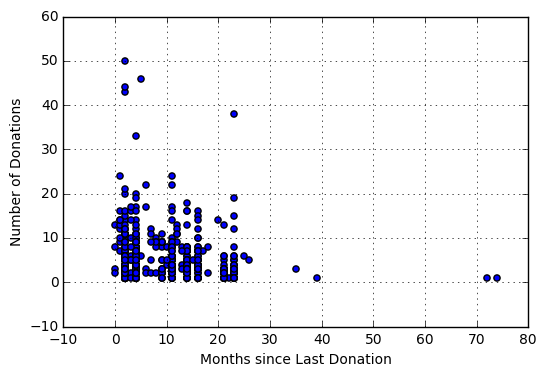

In [18]:
#saving this to remember how to plot inline
%matplotlib inline
b.plot(x='Months since Last Donation', y='Number of Donations', kind='scatter') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d59ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11421ee50>]], dtype=object)

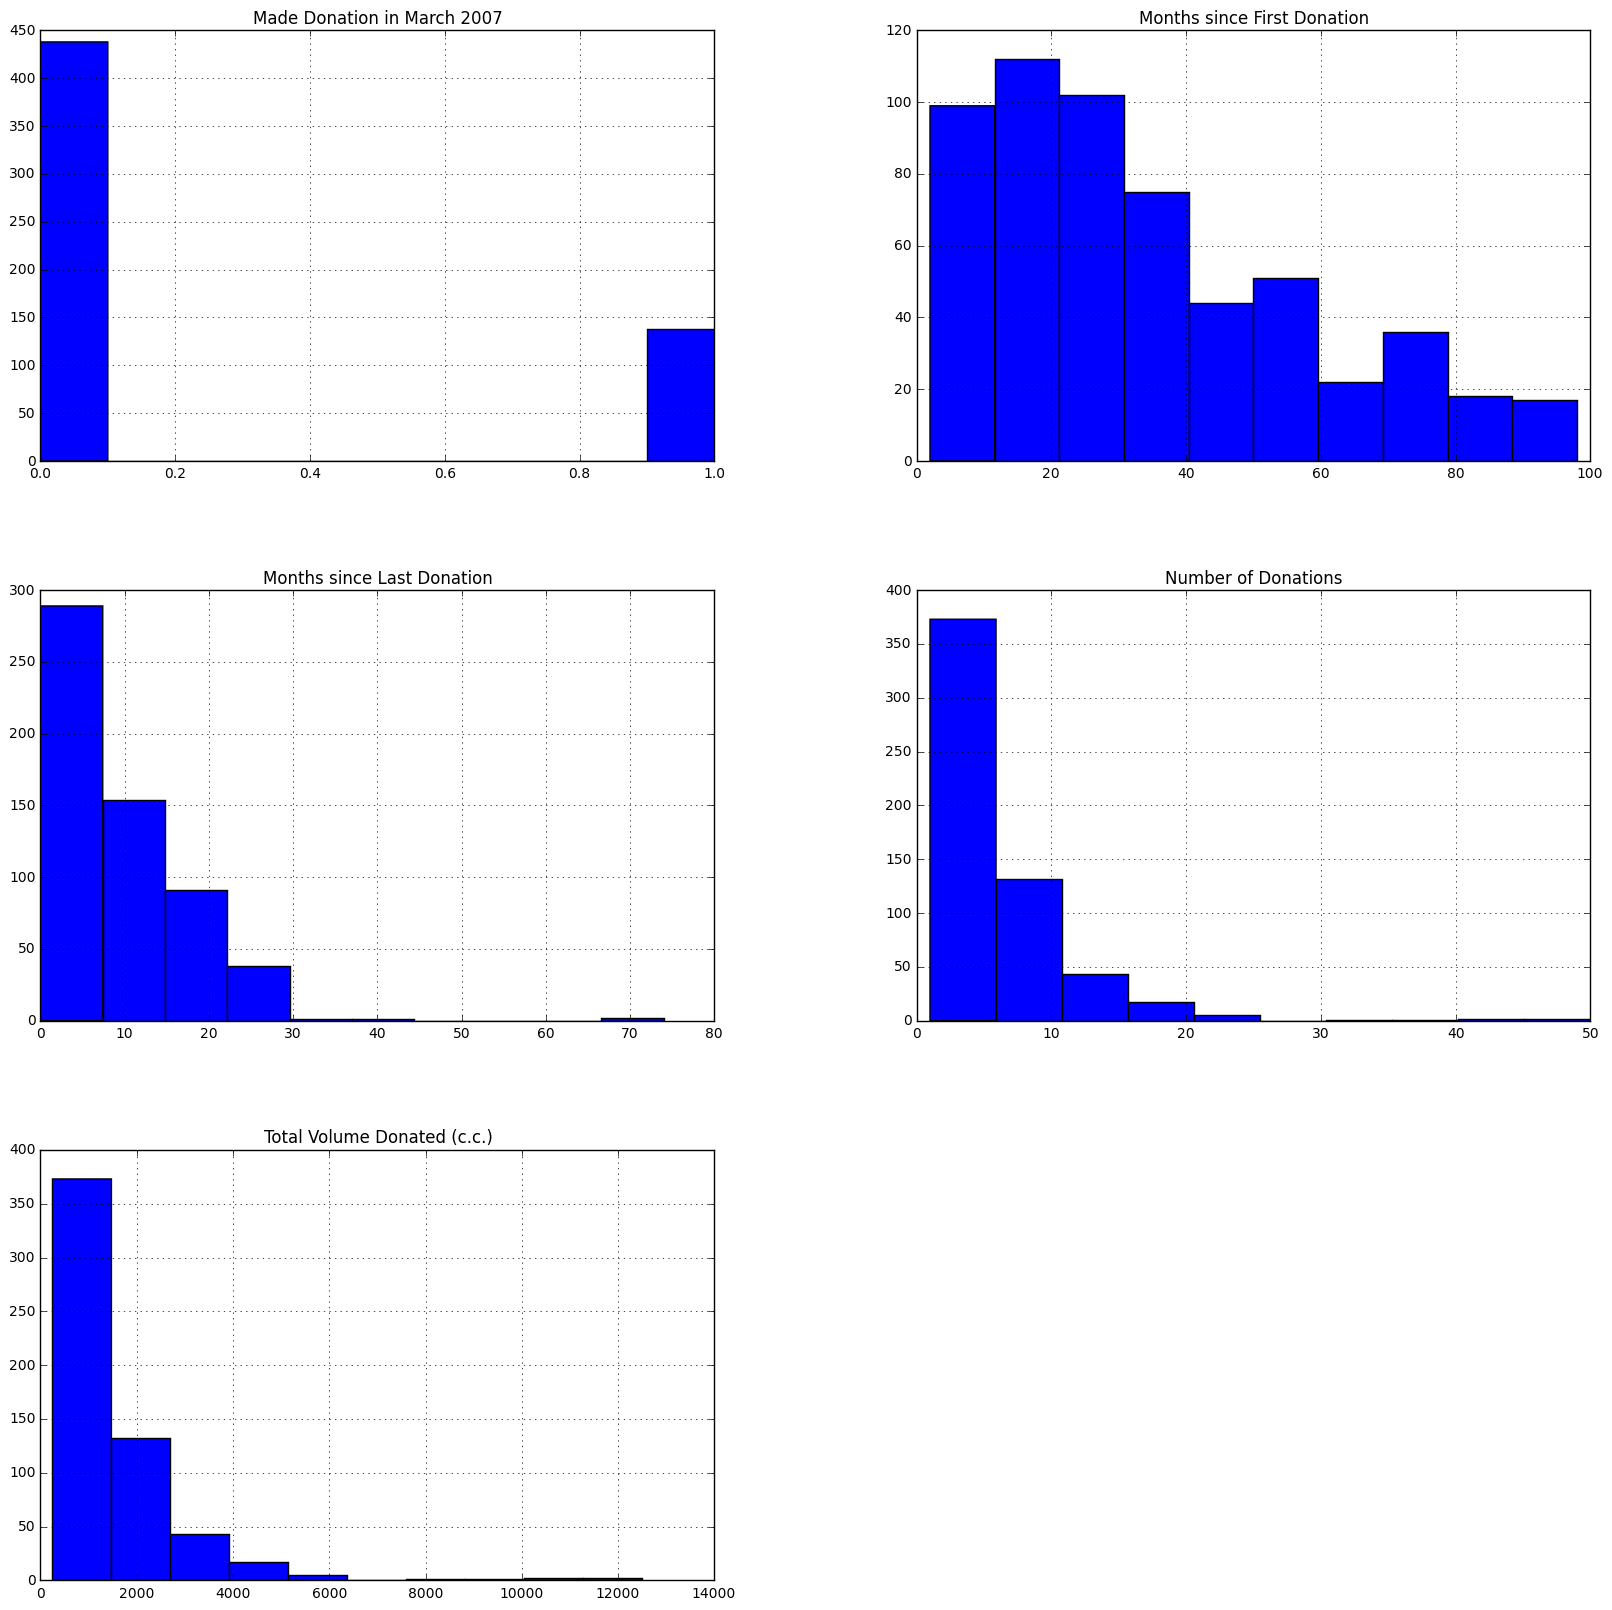

In [27]:
%matplotlib inline
b.hist(figsize=(20,20)) 